# Power Curve
This is an **interactive notebook**! If you run the cells below, it'll give you some sliders that you can adjust to see the effect that p-value threshold (the x-axis on the plot), effect size, and sample size have on the power of a simple t-test.

In [1]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

from ipywidgets import interact
import ipywidgets as widgets

<IPython.core.display.Javascript object>


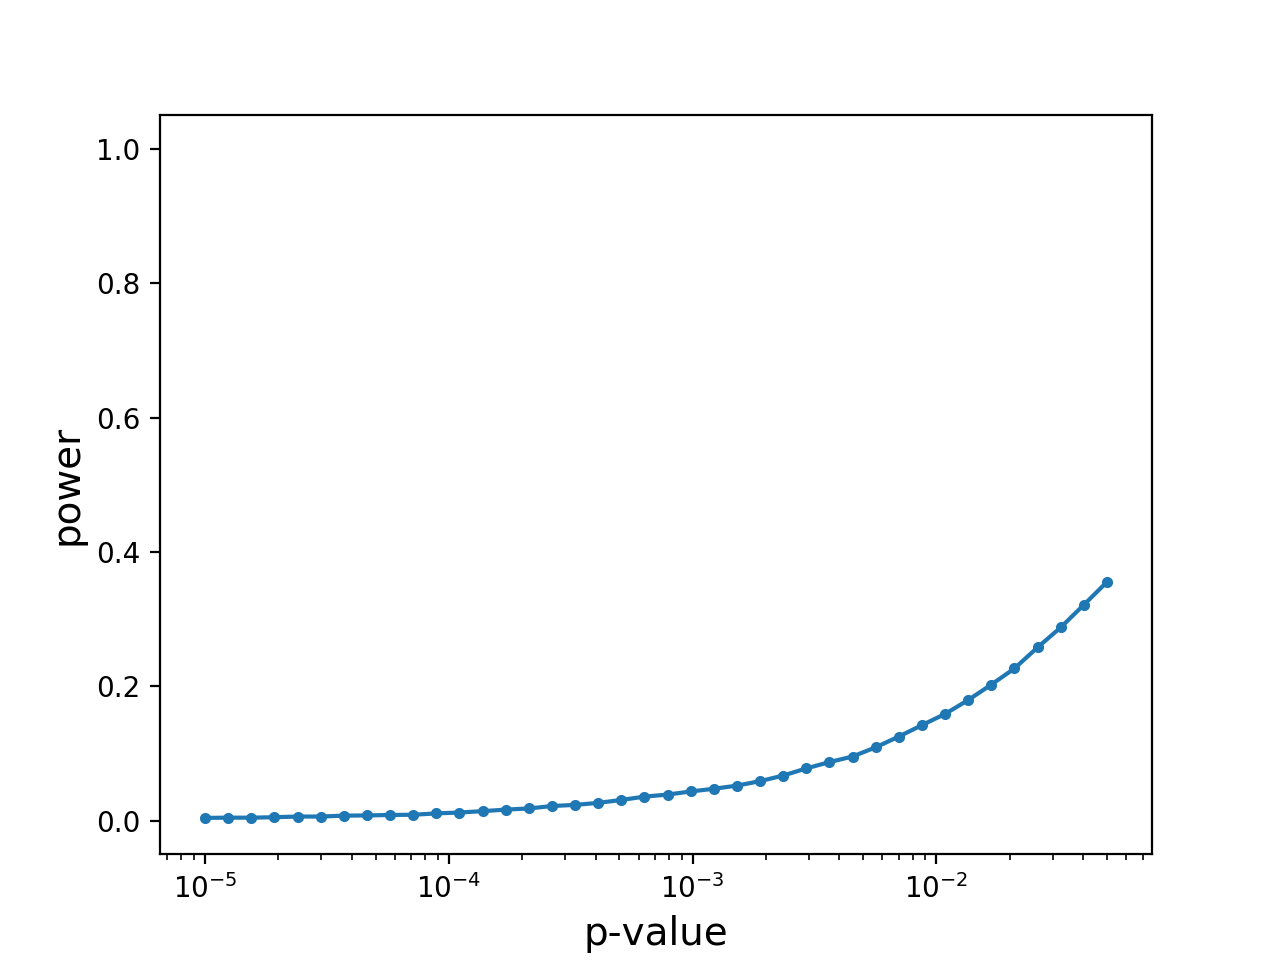

interactive(children=(FloatSlider(value=0.3, description='effect_size', max=1.5, min=0.1), IntSlider(value=100…

In [10]:
num_tests = 3000
p_thresholds = np.logspace(-5, np.log10(0.05), 40)
#p_thresholds = np.logspace(-5, 0, 40)

power_line = plt.semilogx(p_thresholds, np.linspace(0, 1, 40), '.-')
plt.xlabel('p-value', size=14)
plt.ylabel('power', size=14)

def update(effect_size, n):
    arr = np.random.randn(n, num_tests) + effect_size
    t,p = scipy.stats.ttest_1samp(arr, 0)
    
    power = np.array([(p<p_t).mean() for p_t in p_thresholds])    
    power_line[0].set_ydata(power)

effect_size_slider = widgets.FloatSlider(value=0.3, min=0.1, max=1.5, step=0.1)
n_slider = widgets.IntSlider(value=100, min=10, max=250, step=10)
interact(update, effect_size=effect_size_slider, n=n_slider);